In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [863]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Null Imputation

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
df.Gender.fillna(df.Gender.mode()[0],inplace=True)

In [8]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df.Married.fillna(df.Married.mode()[0],inplace=True)

In [10]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df.Dependents.fillna(df.Dependents.mode()[0],inplace=True)

In [12]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace=True)

In [14]:
df.LoanAmount.mean()

146.41216216216216

percentage of outliers: 0.0


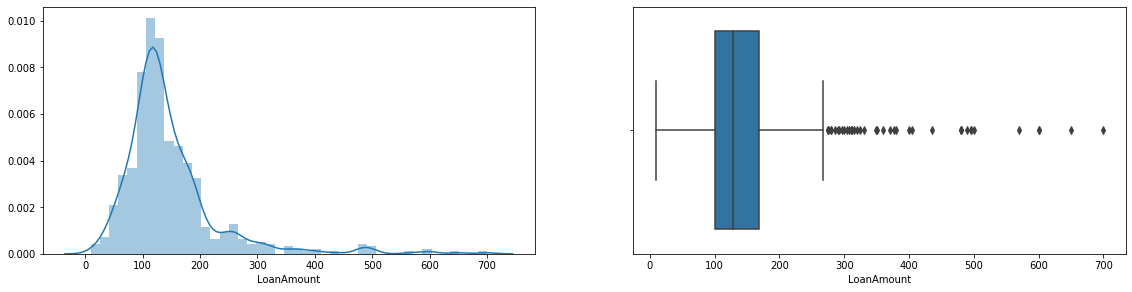

In [875]:
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 1)
sns.distplot(df["LoanAmount"])
plt.subplot(2, 3, 2)
sns.boxplot(df["LoanAmount"])
from scipy import stats
z = np.abs(stats.zscore(df.LoanAmount))
z_out=np.where(z > 3)
print("percentage of outliers:",(len(z_out[0])/len(z))*100)

In [876]:
df.LoanAmount.median()

128.0

In [877]:
df.LoanAmount.fillna(df.LoanAmount.median(),inplace=True)

In [878]:
df.Loan_Amount_Term.median()

360.0

In [879]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median(),inplace=True)

In [880]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [881]:
df.Credit_History.fillna("Unknown",inplace=True)

In [882]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [883]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [884]:
df['Loan_Status']=np.where(df['Loan_Status']=='Y',1,0)

In [885]:
df['Loan_Status']=df['Loan_Status'].astype(int)

In [886]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# EDA

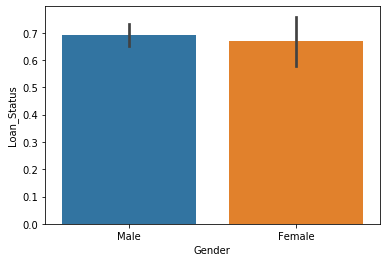

In [887]:
sns.barplot(df.Gender,df.Loan_Status)

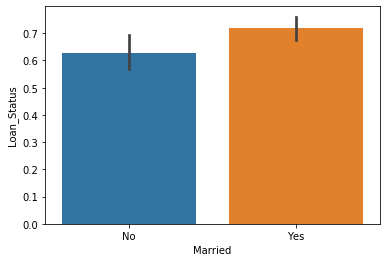

In [888]:
sns.barplot(df.Married,df.Loan_Status)

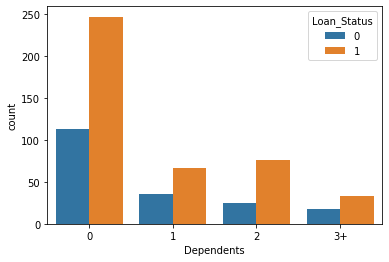

In [889]:
sns.countplot(df['Dependents'],hue=df['Loan_Status'])

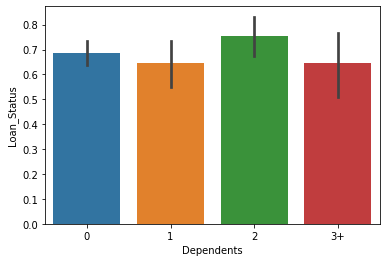

In [890]:
sns.barplot(df['Dependents'],df['Loan_Status'])

In [ ]:
sns.barplot(df['Education'],df['Loan_Status'])

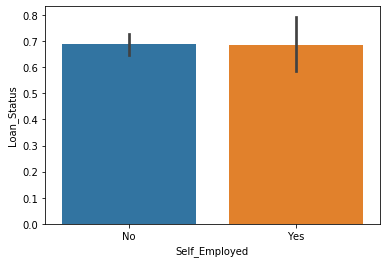

In [984]:
sns.barplot(df['Self_Employed'],df['Loan_Status'])

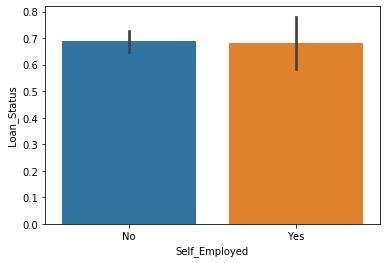

In [892]:
sns.barplot(df['Self_Employed'],df['Loan_Status'])

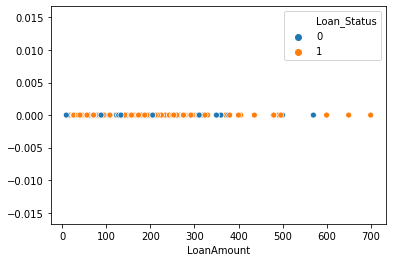

In [893]:
sns.scatterplot(x=df['LoanAmount'],y=np.zeros_like(df['LoanAmount']),hue=df["Loan_Status"])

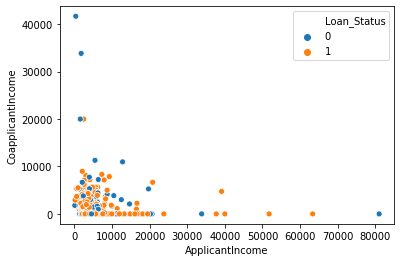

In [894]:
sns.scatterplot(y=df['CoapplicantIncome'],x=df['ApplicantIncome'],hue=df["Loan_Status"])

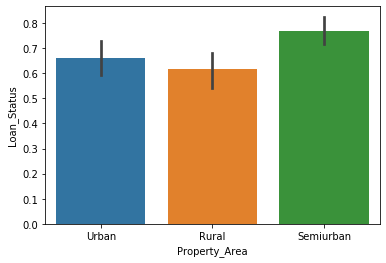

In [895]:
sns.barplot(df.Property_Area,df.Loan_Status)

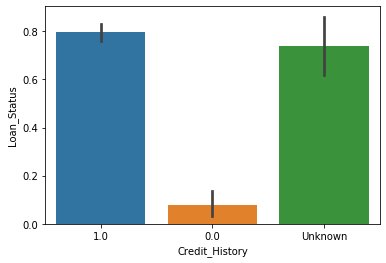

In [974]:
sns.barplot(df.Credit_History,df.Loan_Status)

# Train & Localtest Split

In [896]:
from sklearn.model_selection import train_test_split
train, localtest = train_test_split(
    df,
    test_size=0.3,
    random_state=0,
      )

train.shape, localtest.shape

((429, 13), (185, 13))

In [897]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# FE

In [898]:
train['Total_Income']=train['ApplicantIncome']+ train['CoapplicantIncome']
localtest['Total_Income']=localtest['ApplicantIncome']+ localtest['CoapplicantIncome']

In [899]:
train['Debt_Income_Ratio'] = train['Total_Income'] / train['LoanAmount']
localtest['Debt_Income_Ratio'] = localtest['Total_Income'] / localtest['LoanAmount']

In [900]:
train['Very_Short_Term'] = train['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
train['Short_Term'] = train['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)    
train['Long_Term'] = train['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
train['Very_Long_Term'] = train['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
train.drop('Loan_Amount_Term', axis=1, inplace=True)

localtest['Very_Short_Term'] = localtest['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
localtest['Short_Term'] = localtest['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)    
localtest['Long_Term'] = localtest['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
localtest['Very_Long_Term'] = localtest['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
localtest.drop('Loan_Amount_Term', axis=1, inplace=True)

In [901]:
train.drop("Loan_ID",axis=1,inplace=True)
localtest.drop("Loan_ID",axis=1,inplace=True)

In [902]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term
351,Male,No,0,Graduate,No,8750,4167.0,308.0,1,Rural,0,12917.0,41.938312,0,0,0,1
593,Male,Yes,0,Graduate,No,3859,3300.0,142.0,1,Rural,1,7159.0,50.415493,0,0,1,0
320,Male,Yes,0,Graduate,No,2400,2167.0,115.0,1,Semiurban,1,4567.0,39.713043,0,0,0,1
186,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,0,Rural,0,2178.0,33.000000,0,0,1,0
557,Male,Yes,3+,Graduate,Yes,10139,0.0,260.0,1,Semiurban,1,10139.0,38.996154,0,0,0,1


In [904]:
feature_train=pd.get_dummies(train, columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area'],drop_first=True)
feature_train=pd.get_dummies(feature_train, columns=['Credit_History'])
print(feature_train.shape)
feature_localtest=pd.get_dummies(localtest, columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area'],drop_first=True)
feature_localtest=pd.get_dummies(feature_localtest, columns=['Credit_History'])
print(feature_localtest.shape)

(429, 22)
(185, 22)


In [905]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Total_Income', 'Debt_Income_Ratio',
       'Very_Short_Term', 'Short_Term', 'Long_Term', 'Very_Long_Term'],
      dtype='object')

In [906]:
feature_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status',
       'Total_Income', 'Debt_Income_Ratio', 'Very_Short_Term', 'Short_Term',
       'Long_Term', 'Very_Long_Term', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0', 'Credit_History_Unknown'],
      dtype='object')

In [907]:
feature_localtest.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status',
       'Total_Income', 'Debt_Income_Ratio', 'Very_Short_Term', 'Short_Term',
       'Long_Term', 'Very_Long_Term', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0', 'Credit_History_Unknown'],
      dtype='object')

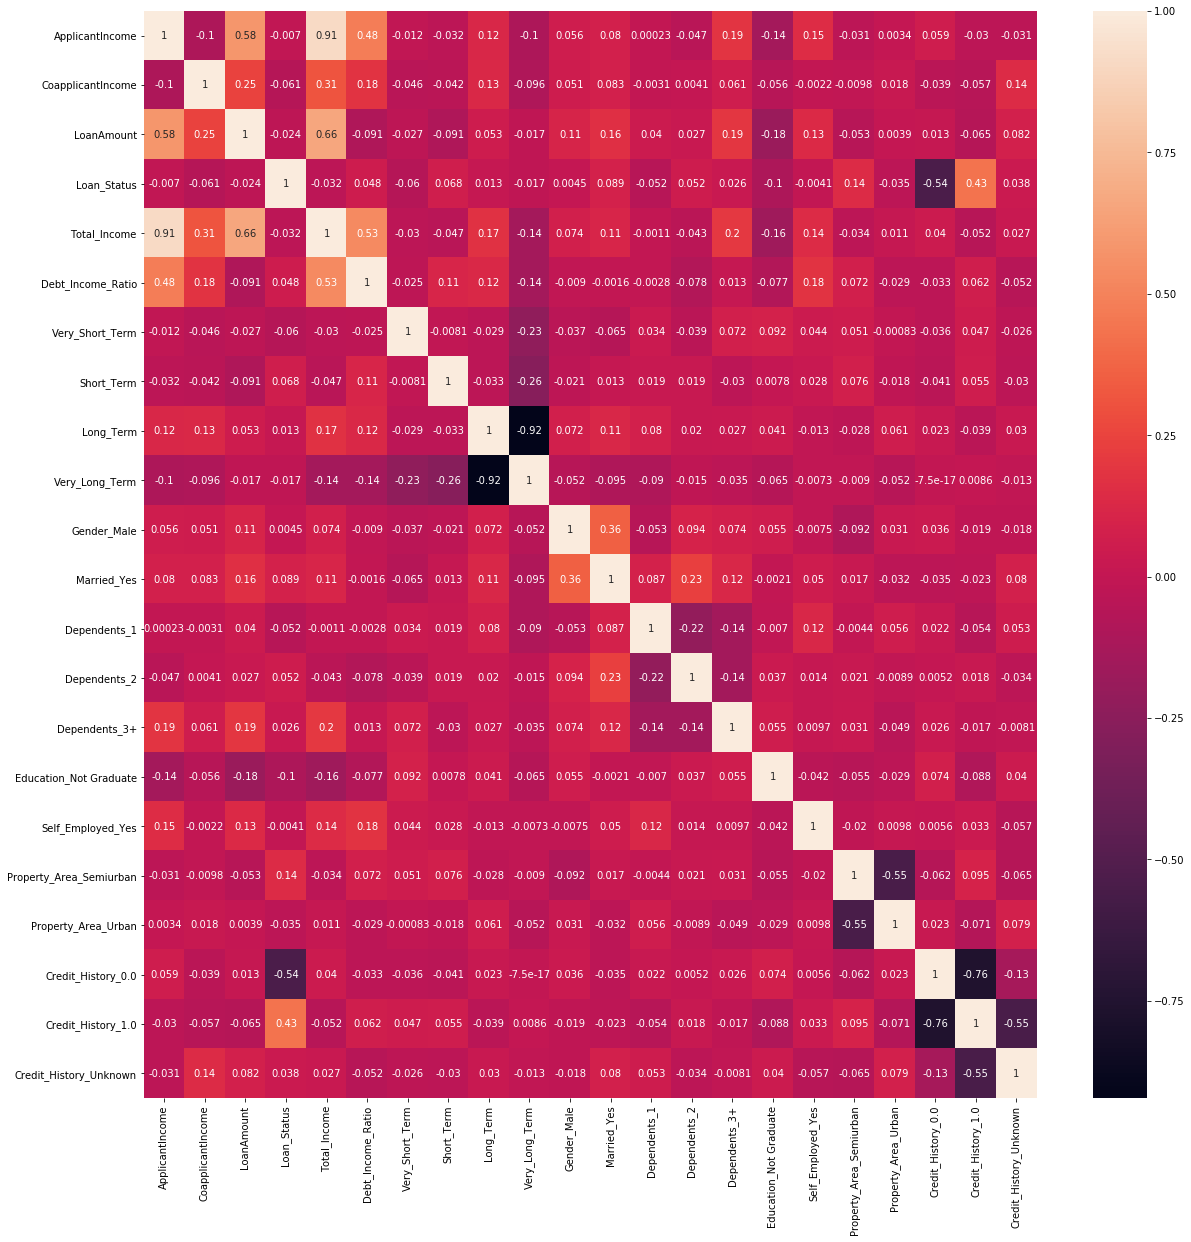

In [977]:
plt.figure(figsize=(20,20))
sns.heatmap(data=feature_train.corr(),annot=True)

# Split in X&y

In [908]:
X_train=feature_train.drop("Loan_Status",axis=1)
y_train=feature_train["Loan_Status"]

X_localtest=feature_localtest.drop("Loan_Status",axis=1)
y_localtest=feature_localtest["Loan_Status"]

X_train.shape, X_localtest.shape, y_train.shape, y_localtest.shape

((429, 21), (185, 21), (429,), (185,))

# Filter Method

In [909]:
from sklearn.feature_selection import VarianceThreshold
varModel=VarianceThreshold(threshold=0) #Setting variance threshold to 0 which means features that have same value in all samples.
varModel.fit(X_train)
constArr=varModel.get_support()
constCol=[col for col in X_train.columns if col not in X_train.columns[constArr]]
constCol
#there are no constant features in the dataset

[]

In [910]:
#Create variance threshold model
quasiModel=VarianceThreshold(threshold=0.01) #It will search for the features having 99% of same value in all samples.
quasiModel.fit(X_train)
quasiArr=quasiModel.get_support()
#Print out quasi constant feature name
quasiCols=[col for col in X_train.columns if col not in X_train.columns[quasiArr]]
quasiCols

['Very_Short_Term', 'Short_Term']

In [911]:
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names
col=correlation(X_train,0.80)
print('Correlated columns:',col)
#using brute for method to call out highly correlated features

Correlated columns: {'Total_Income', 'Very_Long_Term'}


In [912]:
X_train.drop(['Very_Short_Term','Total_Income', 'Short_Term', 'Very_Long_Term'],axis=1,inplace=True)
X_localtest.drop(['Very_Short_Term','Total_Income', 'Short_Term','Very_Long_Term'],axis=1,inplace=True)

In [913]:
main_features=list(X_train.columns)
X_train.shape,X_localtest.shape,len(main_features)

((429, 17), (185, 17), 17)

# XGBoost

In [914]:
from xgboost import XGBClassifier

In [915]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [916]:
y_pred_xgb=xgb.predict(X_localtest)

In [917]:
from sklearn import metrics
print("f1 score for xgb:",metrics.f1_score(y_localtest,y_pred_xgb))

f1 score for xgb: 0.8776978417266188


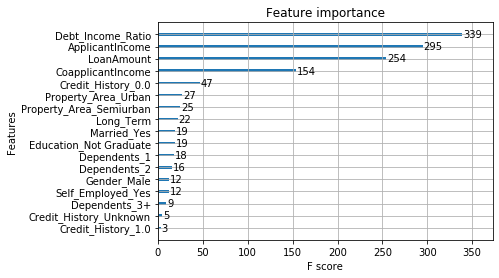

In [918]:
from xgboost import plot_importance
plot_importance(xgb)
plt.show()

In [919]:
print(metrics.classification_report(y_localtest,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63        51
           1       0.85      0.91      0.88       134

    accuracy                           0.82       185
   macro avg       0.78      0.74      0.75       185
weighted avg       0.81      0.82      0.81       185



# Hyperparameter tuning XGB (Randomized Search CV)

In [920]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [200, 400, 600, 800]
}

In [921]:
classifier=XGBClassifier(random_state=0)
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='f1',n_jobs=-1,cv=5,verbose=2,random_state=0)

In [922]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   45.0s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [923]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [924]:
xgb_tuned=random_search.best_estimator_

In [925]:
xgb_tuned.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [926]:
y_pred_xgb_tuned=xgb_tuned.predict(X_localtest)

In [927]:
from sklearn import metrics
print("f1 score for xgb tuned:",metrics.f1_score(y_localtest,y_pred_xgb_tuned))

f1 score for xgb tuned: 0.8811188811188811


In [928]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_tuned,X_train,y_train,cv=5,scoring='f1')

In [929]:
score.mean()

0.8440934690057513

# Hyperparameter tuning XGB (Grid Search CV)

In [955]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [1, 3, 5, 7 ],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [200, 400, 600, 800]
}

In [958]:
classifier=XGBClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(classifier,param_grid=params,scoring='f1',n_jobs=-1,cv=5,verbose=2)

In [959]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 15360 candidates, totalling 76800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [960]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [961]:
xgb_grid_tuned=grid_search.best_estimator_

In [962]:
xgb_grid_tuned.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [963]:
y_pred_xgb_grid_tuned=xgb_grid_tuned.predict(X_localtest)

In [964]:
from sklearn import metrics
print("f1 score for xgb tuned:",metrics.f1_score(y_localtest,y_pred_xgb_grid_tuned))

f1 score for xgb tuned: 0.8989547038327527


In [973]:
print(metrics.classification_report(y_localtest,y_pred_xgb_grid_tuned))

              precision    recall  f1-score   support

           0       0.84      0.53      0.65        51
           1       0.84      0.96      0.90       134

    accuracy                           0.84       185
   macro avg       0.84      0.75      0.77       185
weighted avg       0.84      0.84      0.83       185



In [965]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_grid_tuned,X_train,y_train,cv=5,scoring='f1')

In [966]:
score.mean()

0.8647041533735083

# LightGBM

In [978]:
import lightgbm as lgb

In [979]:
d_train = lgb.Dataset(X_train, label= y_train)

In [980]:
params = {}
params['learning_rate']= 0.003
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='binary_logloss'
params['sub_feature']=0.5
params['num_leaves']= 10
params['min_data']=50
params['max_depth']=10

In [981]:
clf= lgb.train(params, d_train,10000)

In [982]:
y_pred_lgbm = clf.predict(X_localtest)
for i in range(0,len(X_localtest)):
    if (y_pred_lgbm[i] >= 0.5):
        y_pred_lgbm[i] = 1
    else:
        y_pred_lgbm[i] =0

In [983]:
from sklearn import metrics
print("f1 score for lgbm:",metrics.f1_score(y_localtest,y_pred_lgbm))

f1 score for lgbm: 0.8692579505300354


# Test.csv

In [936]:
test=pd.read_csv('test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [937]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [938]:
test.Gender.fillna(test.Gender.mode()[0],inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace=True)
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace=True)
test.LoanAmount.fillna(test.LoanAmount.median(),inplace=True)
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.median(),inplace=True)
test.Credit_History.fillna("Unknown",inplace=True)

In [939]:
test['Total_Income']=test['ApplicantIncome']+ test['CoapplicantIncome']

In [940]:
test['Debt_Income_Ratio']=test['Total_Income']/test['LoanAmount']

In [941]:
test['Very_Short_Term'] = test['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
test['Short_Term'] = test['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)    
test['Long_Term'] = test['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
test['Very_Long_Term'] = test['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
test.drop('Loan_Amount_Term', axis=1, inplace=True)

In [942]:
test=pd.get_dummies(test, columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area'],drop_first=True)
test=pd.get_dummies(test, columns=['Credit_History'])
print(test.shape)

(367, 22)


In [943]:
test.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Total_Income', 'Debt_Income_Ratio', 'Very_Short_Term', 'Short_Term',
       'Long_Term', 'Very_Long_Term', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0', 'Credit_History_Unknown'],
      dtype='object')

In [944]:
X_test=pd.DataFrame(test,columns=main_features)

In [945]:
print(len(X_test.columns),len(X_train.columns))

17 17


In [946]:
print(X_train.columns)
print(X_test.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Debt_Income_Ratio', 'Long_Term', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0', 'Credit_History_Unknown'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Debt_Income_Ratio', 'Long_Term', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0', 'Credit_History_Unknown'],
      dtype='object')


In [947]:
frames=[X_train,X_localtest]
X_complete_train=pd.concat(frames)
X_complete_train.shape

(614, 17)

In [948]:
y_complete_train=y_train.append(y_localtest)
len(y_complete_train)

614

In [967]:
xgb_grid_tuned.fit(X_complete_train,y_complete_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

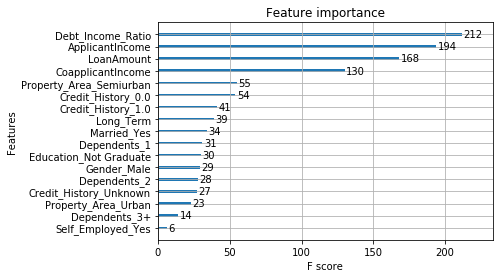

In [968]:
from xgboost import plot_importance
plot_importance(xgb_grid_tuned)
plt.show()

In [969]:
y_test=xgb_grid_tuned.predict(X_test)

In [970]:
submission=pd.DataFrame({'Loan_ID': test["Loan_ID"],'Loan_Status':y_test})

In [971]:
submission['Loan_Status']=np.where(submission['Loan_Status']==1,'Y','N')

In [972]:
submission.to_csv('xgb grid ht.csv',index=False)